# Data Analysis

In this step will do the following: 

- Store our raw data into our PostgresSQL Database to start standarizing our data model. 
- Read the data from our DB and perform an initial data analysis. 


In [75]:
import os
import json
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import sqlalchemy


## Functions

In [76]:
from utils import create_table_postgres, drop_table_postgres, list_tables_postgres

## 1. Check Local PostgresSQL DB

In [77]:
with open('config.json') as f:
    conf = json.load(f)

conn_str =('postgresql://{}:{}@localhost:{}/{}'
            .format(conf["user"], 
                    conf["passw"],
                    conf["port"], 
                    conf["database"]))

engine = sqlalchemy.create_engine(conn_str)
insp = sqlalchemy.inspect(engine)

# Check current Available Tables
list_tables_postgres(engine=engine)

['volume_bronze', 'plants_gold', 'connections_gold', 'inbound_volume_silver', 'cartable', 'insurancetable', 'inbound_volume_gold', 'humanResourceTable', 'inbound_volume_bronze', 'providers_gold']


Currently there are only three tables in our database. Let`s read the data from the CSV files and store them in the SQL Database. 

In [78]:
tables = ['inbound_volume_bronze', 'volume_bronze', 'plants_gold', 'connections_gold', 'providers_gold']

for tbl in tables: 
    print("Dropping table ", tbl)
    drop_table_postgres(tbl_name=tbl, engine=engine)

Dropping table  inbound_volume_bronze
Table inbound_volume_bronze, deleted.
Dropping table  volume_bronze
Table volume_bronze, deleted.
Dropping table  plants_gold
Table plants_gold, deleted.
Dropping table  connections_gold
Table connections_gold, deleted.
Dropping table  providers_gold
Table providers_gold, deleted.


## Store Inbound Volume Data

In [79]:
df_vol = pd.read_csv("data/inbound_volume_data.csv", index_col=0)
df_vol.head()

,Timestamp,Provider,Plant,Actual Vol [Kg],Expected Vol [Kg]
0,2015/07,Provider_1,Plant_1,19096,20298
1,2015/08,Provider_1,Plant_1,187139,189973
2,2015/09,Provider_1,Plant_1,181149,187798
3,2015/10,Provider_1,Plant_1,202677,202327
4,2015/11,Provider_1,Plant_1,272902,271765


In [80]:
# Create Table Inbound Volume
tbl_name = "inbound_volume_bronze"
create_table_postgres(df=df_vol, 
                    tbl_name=tbl_name, 
                    if_exists='replace',
                    engine=engine,
                    insp=insp)

table inbound_volume_bronze replaced.


In [81]:
# Verify that we can read the data
pd.read_sql_query(f"SELECT * FROM {tbl_name}",engine).head()

,index,Timestamp,Provider,Plant,Actual Vol [Kg],Expected Vol [Kg]
0,0,2015/07,Provider_1,Plant_1,19096,20298
1,1,2015/08,Provider_1,Plant_1,187139,189973
2,2,2015/09,Provider_1,Plant_1,181149,187798
3,3,2015/10,Provider_1,Plant_1,202677,202327
4,4,2015/11,Provider_1,Plant_1,272902,271765


In [82]:
# Verify new created table
list_tables_postgres(engine=engine)

['inbound_volume_silver', 'cartable', 'insurancetable', 'inbound_volume_gold', 'humanResourceTable', 'inbound_volume_bronze']


## Store Production Data

In [88]:
df_prod = pd.read_csv("data/production_data.csv", index_col=0)
df_prod.head()

,Timestamp,Plant_6,Plant_9,Plant_13,Plant_15,Plant_17,Plant_19,Plant_21,Plant_11,Plant_4,Plant_12,Plant_20,Plant_14,Plant_22,Plant_1,Plant_3,Plant_5,Plant_18,Plant_10
0,2014/01,11848,54138,33839,19438,6770,29098,45147,8578,326919,11668,93855,68067,13127,26363,26363,5799,13749,3633
1,2014/02,13528,53063,36690,24252,6943,26975,42656,9739,334540,11275,92865,66012,18565,29822,29822,7978,12880,2880
2,2014/03,12753,50551,38211,24978,7695,28991,46226,10619,356075,12306,99860,71251,19505,28915,28915,8149,13348,4165
3,2014/04,12681,52528,36979,23872,7436,27409,47929,10379,351736,11790,95409,66233,23983,29441,29441,5020,15650,4457
4,2014/05,13272,50855,31164,24145,7415,27959,47255,12155,332888,10407,97371,69890,21139,28110,28110,7087,15940,4035


In [89]:
# Create Table Inbound Volume
tbl_name = "production_bronze"
create_table_postgres(df=df_prod, 
                    tbl_name=tbl_name, 
                    if_exists='replace',
                    engine=engine,
                    insp=insp)

table production_bronze replaced.


In [90]:
# Verify that we can read the data
pd.read_sql_query(f"SELECT * FROM {tbl_name}",engine).head()

,index,Timestamp,Plant_6,Plant_9,Plant_13,Plant_15,Plant_17,Plant_19,Plant_21,Plant_11,Plant_4,Plant_12,Plant_20,Plant_14,Plant_22,Plant_1,Plant_3,Plant_5,Plant_18,Plant_10
0,0,2014/01,11848,54138,33839,19438,6770,29098,45147,8578,326919,11668,93855,68067,13127,26363,26363,5799,13749,3633
1,1,2014/02,13528,53063,36690,24252,6943,26975,42656,9739,334540,11275,92865,66012,18565,29822,29822,7978,12880,2880
2,2,2014/03,12753,50551,38211,24978,7695,28991,46226,10619,356075,12306,99860,71251,19505,28915,28915,8149,13348,4165
3,3,2014/04,12681,52528,36979,23872,7436,27409,47929,10379,351736,11790,95409,66233,23983,29441,29441,5020,15650,4457
4,4,2014/05,13272,50855,31164,24145,7415,27959,47255,12155,332888,10407,97371,69890,21139,28110,28110,7087,15940,4035


In [91]:
# Verify new created table
list_tables_postgres(engine=engine)

['inbound_volume_silver', 'cartable', 'insurancetable', 'inbound_volume_gold', 'humanResourceTable', 'inbound_volume_bronze', 'production_bronze']


Now that we have stored the data in our database. We can explore it in more detail. We have two input data sources, which come from two different systems: 

- **Inbound_Volume_Data.csv** contains the historical transported material volume since January 2014 until October 2022 on monthly basis. This data comes from the Logistics Parts Mangement System.
    - **Timestamp**: Monthly data of the format YYYY/MM.
    - **Provider**: Logistics Service Provider.
    - **Plant**: Assembly Plant. 
    - **Actual Vol [Kg]**: Actual transported volume from Provider to Plant in kg. 
    - **Expected Vol [Kg]**: Expected transported volume from Provider to Plant in kg.*
- **production_data.csv** contains the historical production levels of all the european plants in number of vehicles per month from January 2014 until October 2022. The rest refers to planned production values. 
    - **Timestamp**:  Monthly data of the format YYYY/MM.
    - **Plant_X**: Column containing the production level for Plant X.

**Expected in this context means the volume value which the internal ERP system would calculate. That means, given the number of units in the call-off order and using the weights of the parts, the total expected weight of a delivery can be calculated. However, as mentioned before, due to the sync issue, the delivered volume and expected volume would differ.*

## Analysis Volume Data

In [60]:
tbl_name = 'inbound_volume_bronze'
df_vol = pd.read_sql_query(f"SELECT * FROM {tbl_name}",engine)

In [61]:
df_vol.head()

,index,Timestamp,Provider,Plant,Actual Vol [Kg],Expected Vol [Kg]
0,0,2015/07,Provider_1,Plant_1,19096,20298
1,1,2015/08,Provider_1,Plant_1,187139,189973
2,2,2015/09,Provider_1,Plant_1,181149,187798
3,3,2015/10,Provider_1,Plant_1,202677,202327
4,4,2015/11,Provider_1,Plant_1,272902,271765


In [62]:
print("Unique Providers", df_vol['Provider'].nunique())
print("Unique Assembly Plants", df_vol['Plant'].nunique())

Unique Providers 38
Unique Assembly Plants 18


In [63]:
df_vol.shape

(47058, 6)

There are **38** unique Providers and **18** Assembly Plants. The historical volume data contains, 47.058 datapoints, each data point means a material volume transportation from Provider X to Plant Y in the given month. However, all data is loaded as string. Therefore we will need to cast the columns to the right format. 

In [64]:
df_vol.describe(include='object')

,Timestamp,Provider,Plant,Actual Vol [Kg],Expected Vol [Kg]
count,47058,47058,47058,47055,46951
unique,106,38,18,45291,46179
top,2018/08,Provider_3,Plant_19,160,0
freq,493,1779,2922,17,57


In [65]:
df_vol[['Provider','Plant']].drop_duplicates().count()

Provider    624
Plant       624
dtype: int64

There are **624** possible connection in the network. Since the number of **Plants**, **Providers** and **Connections** are key dimensions of the whole problem we can store them directly in our **Gold Layer**.

In [66]:
# Create Table Plants
tbl_name = "plants_gold"
create_table_postgres(df=df_vol[['Plant']].drop_duplicates().reset_index(drop=True), 
                    tbl_name=tbl_name, 
                    if_exists='replace',
                    engine=engine,
                    insp=insp)

# Create Table Providers
tbl_name = "providers_gold"
create_table_postgres(df=df_vol[['Provider']].drop_duplicates().reset_index(drop=True), 
                    tbl_name=tbl_name, 
                    if_exists='replace',
                    engine=engine,
                    insp=insp)

# Create Table for Connections
tbl_name = "connections_gold"
create_table_postgres(df=df_vol[['Provider','Plant']].drop_duplicates().reset_index(drop=True),
                    tbl_name=tbl_name, 
                    if_exists='replace',
                    engine=engine,
                    insp=insp)

table plants_gold replaced.
table providers_gold replaced.
table connections_gold replaced.


In [67]:
# Verify new created table
list_tables_postgres(engine=engine)

['cartable', 'insurancetable', 'inbound_volume_bronze', 'providers_gold', 'humanResourceTable', 'volume_bronze', 'plants_gold', 'connections_gold']


## Inbound Logistics Network Analysis

We can use the python package `networkx` to analyze the structure of the network. We can use the plotting functions to visualize it and understand how the Providers distribute material volume to the plants. First of all, we can model this problem as a bipartite graph, since the forecasting focuses only in the main legs of the Area Forwarding-based Inbound Logistics Network.

In [68]:
# Define nodes and edges
provider_nodes = df_vol['Provider'].to_list()
plant_nodes = df_vol['Plant'].to_list()
network_tuples_edges = [(x, y) for x, y in df_vol[['Provider', 'Plant']].drop_duplicates().values]

# Create Bipartite directed Graph
inbound_log_graph = nx.DiGraph()
inbound_log_graph.add_nodes_from(provider_nodes, bipartite=0)
inbound_log_graph.add_nodes_from(plant_nodes, bipartite=1)
inbound_log_graph.add_edges_from(network_tuples_edges)

# Graph Metrics
num_edges = inbound_log_graph.number_of_edges()
num_nodes = inbound_log_graph.number_of_nodes()
print(f"Number of main leg connection (edges) in the network: {num_edges}")
print(f"Number of nodes in the network: {num_nodes}")

Number of main leg connection (edges) in the network: 624
Number of nodes in the network: 56


The following image provide a good representation of the bipartite behaviour of the network. Since we only focus on the main leg, the network complexity is simplified. So that we can later either forecast the individual edges or also take into account cross-correlations among different Providers, when they deliver material flow to the same Plant.

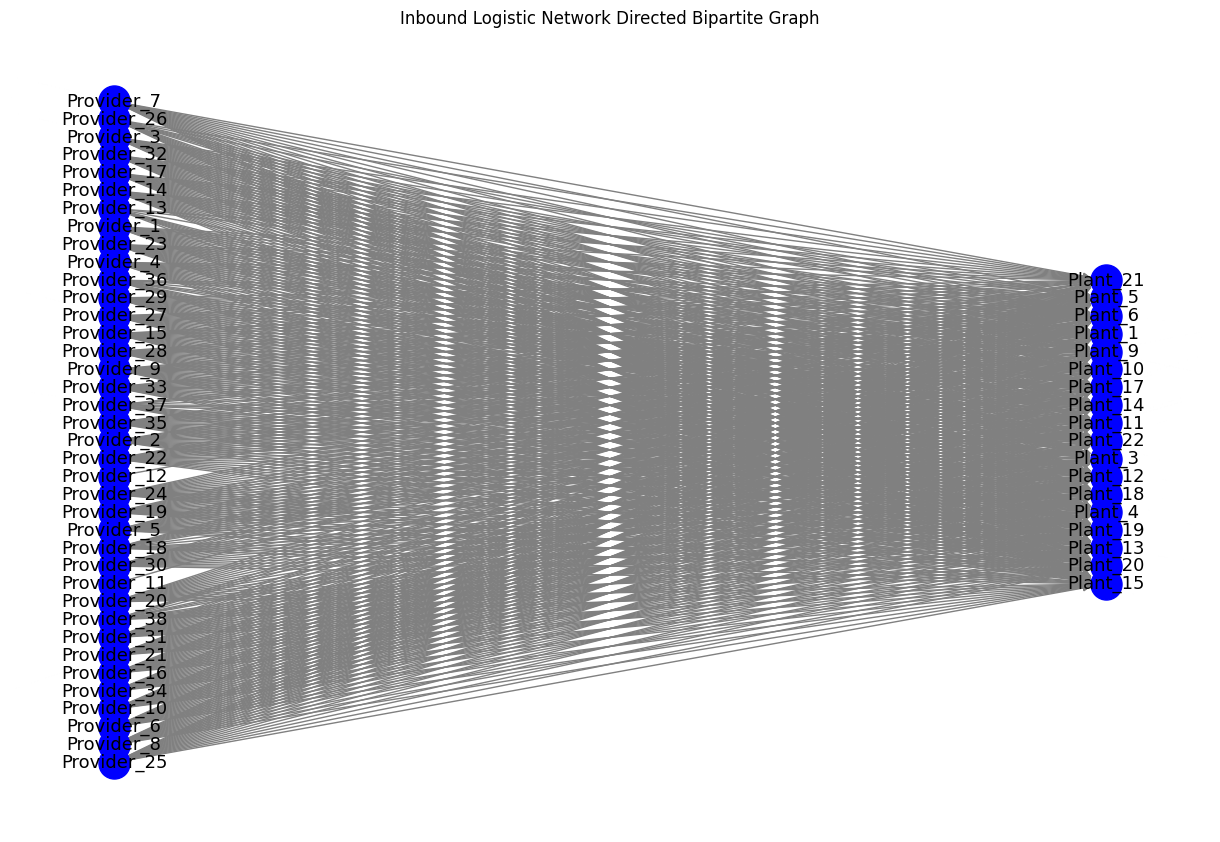

In [69]:
file_name =  f"Inbound_Logistics_Network_Bipartite_Graph.png"
output_path = os.path.join("img", file_name)

plt.figure(figsize=(12, 8))
pos = nx.multipartite_layout(inbound_log_graph, subset_key="bipartite")

# Draw the subgraph
nx.draw(
    inbound_log_graph,
    pos,
    with_labels=True,
    node_color="blue",
    edge_color="gray",
    node_size=500,
    font_size=13,
)

plt.title(f"Inbound Logistic Network Directed Bipartite Graph")
plt.savefig(output_path)

On the other side, while plotting the network for only two providers we can better appreciate the network.

Text(0.5, 1.0, 'Inbound Logistic Network for providers Provider_4 and Provider_1')

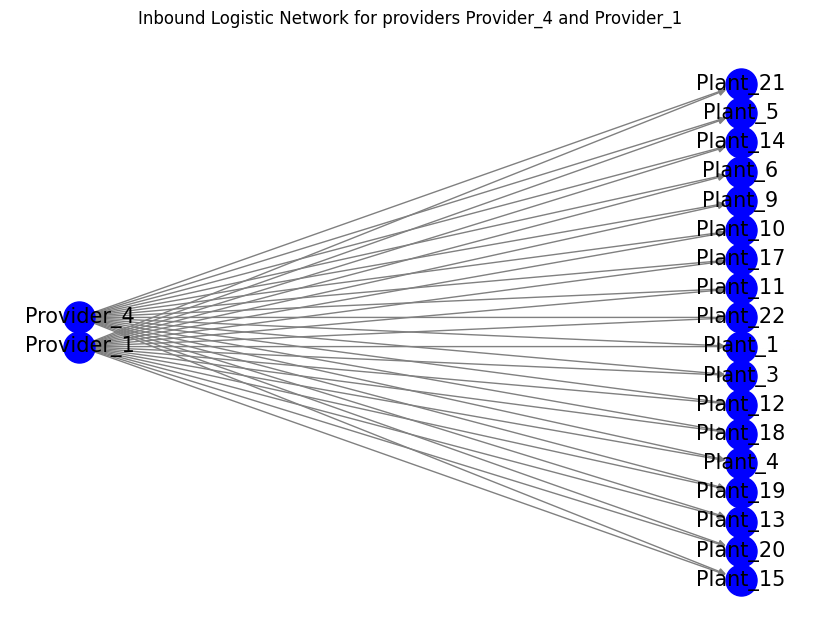

In [70]:
node = 'Provider_4'
node2 = 'Provider_1'
neighbors = list(inbound_log_graph.neighbors(node)) + [node]
neighbors2 = list(inbound_log_graph.neighbors(node2)) + [node2]

subgraph = inbound_log_graph.subgraph(neighbors + neighbors2)
plt.figure(figsize=(8, 6))
pos = nx.multipartite_layout(subgraph, subset_key="bipartite")

# Draw the subgraph
nx.draw(
    subgraph,
    pos,
    with_labels=True,
    node_color="blue",
    edge_color="gray",
    node_size=500,
    font_size=15,
)

plt.title(f"Inbound Logistic Network for providers {node} and {node2}")

## Analysis Production Data

This file contains data from 18 Plants. In April 2020 due to the Covid outbrake, no production was made. Therefore, there is a 0 in this entry for all plants.

In [71]:
df_prod.head()

,Timestamp,Plant_6,Plant_9,Plant_13,Plant_15,Plant_17,Plant_19,Plant_21,Plant_11,Plant_4,Plant_12,Plant_20,Plant_14,Plant_22,Plant_1,Plant_3,Plant_5,Plant_18,Plant_10
0,2014/01,11848,54138,33839,19438,6770,29098,45147,8578,326919,11668,93855,68067,13127,26363,26363,5799,13749,3633
1,2014/02,13528,53063,36690,24252,6943,26975,42656,9739,334540,11275,92865,66012,18565,29822,29822,7978,12880,2880
2,2014/03,12753,50551,38211,24978,7695,28991,46226,10619,356075,12306,99860,71251,19505,28915,28915,8149,13348,4165
3,2014/04,12681,52528,36979,23872,7436,27409,47929,10379,351736,11790,95409,66233,23983,29441,29441,5020,15650,4457
4,2014/05,13272,50855,31164,24145,7415,27959,47255,12155,332888,10407,97371,69890,21139,28110,28110,7087,15940,4035


In [72]:
# There was no production in April 2020 due to the Covid lockdown
df_prod[df_prod['Timestamp']=="2020/04"]

,Timestamp,Plant_6,Plant_9,Plant_13,Plant_15,Plant_17,Plant_19,Plant_21,Plant_11,Plant_4,Plant_12,Plant_20,Plant_14,Plant_22,Plant_1,Plant_3,Plant_5,Plant_18,Plant_10
75,2020/04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [73]:
df_prod.describe()

,Plant_6,Plant_9,Plant_13,Plant_15,Plant_17,Plant_19,Plant_21,Plant_11,Plant_4,Plant_12,Plant_20,Plant_14,Plant_22,Plant_1,Plant_3,Plant_5,Plant_18,Plant_10
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.00000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,13486.116667,41007.675000,24771.058333,22840.625000,7454.408333,28224.400000,42591.175000,14639.016667,308748.908333,7596.100000,88380.708333,83607.033333,67994.27500,68041.225000,68041.225000,11089.691667,11813.000000,4428.658333
std,2661.744876,11119.648605,6856.099049,6229.474383,1541.047944,7218.555478,8472.606887,3303.749060,64233.309356,3709.346588,33069.851139,19596.796614,29526.32378,15112.725171,15112.725171,3732.863437,3669.537809,1312.024989
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11801.250000,33925.250000,18984.500000,18685.250000,6731.750000,24553.500000,38480.250000,13044.750000,282283.000000,4696.750000,61097.500000,72464.750000,39057.25000,62559.750000,62559.750000,8344.750000,9311.000000,3597.250000
50%,14181.500000,40437.500000,25675.500000,23967.000000,7801.000000,29025.500000,44473.500000,15307.500000,320305.000000,7987.500000,91953.000000,84206.000000,78820.50000,70230.500000,70230.500000,11745.000000,12699.500000,4820.000000
75%,15411.000000,49781.000000,30391.750000,27783.250000,8540.000000,33766.500000,48417.500000,16917.000000,353522.000000,10856.000000,113225.750000,98304.250000,90962.75000,78281.500000,78281.500000,14083.750000,14570.000000,5334.750000
max,18293.000000,65813.000000,38211.000000,33676.000000,9559.000000,41107.000000,57381.000000,18742.000000,409207.000000,13145.000000,153941.000000,121995.000000,113411.00000,90747.000000,90747.000000,16808.000000,17581.000000,7446.000000


In [74]:
df = df_prod.describe().reset_index()
df[df['index'] == 'max'].drop(columns=['index']).max(axis=1)

7    409207.0
dtype: float64

The line above describes some statistics for the different plants. We can see that the min volume production is 0. Corresponding to the month of April 2020. The max production corresponds to the Plant_4 with a value of 409.207.